### **Nombre:** Elda Magally Calderón Motta
### **Carné:** 16003182
### **Sección:** Virtual

# **TAREA 2**

## Parte 1 - Modelo exponencial de covid-19 usando feature-eng

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import datetime
from scipy.stats import norm

In [65]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()

In [66]:
a = pd.read_csv('Covid_19_clean_complete.csv')

In [67]:
print(a)
print(a.columns)

      Province/State         Country/Region        Lat       Long     Date  \
0                NaN            Afghanistan  33.000000  65.000000  1/22/20   
1                NaN                Albania  41.153300  20.168300  1/22/20   
2                NaN                Algeria  28.033900   1.659600  1/22/20   
3                NaN                Andorra  42.506300   1.521800  1/22/20   
4                NaN                 Angola -11.202700  17.873900  1/22/20   
...              ...                    ...        ...        ...      ...   
31530            NaN  Sao Tome and Principe   0.186360   6.613081  5/19/20   
31531            NaN                  Yemen  15.552727  48.516388  5/19/20   
31532            NaN                Comoros -11.645500  43.333300  5/19/20   
31533            NaN             Tajikistan  38.861034  71.276093  5/19/20   
31534            NaN                Lesotho -29.609988  28.233608  5/19/20   

       Confirmed  Deaths  Recovered  
0              0       0 

In [68]:
a.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

### Casos Confirmados en Guatemala

In [69]:
GT_casos = a[(a["Country/Region"] == 'Guatemala') & (a["Confirmed"] > 0)]
print(GT_casos)

      Province/State Country/Region      Lat     Long     Date  Confirmed  \
13903            NaN      Guatemala  15.7835 -90.2308  3/14/20          1   
14168            NaN      Guatemala  15.7835 -90.2308  3/15/20          1   
14433            NaN      Guatemala  15.7835 -90.2308  3/16/20          2   
14698            NaN      Guatemala  15.7835 -90.2308  3/17/20          6   
14963            NaN      Guatemala  15.7835 -90.2308  3/18/20          6   
...              ...            ...      ...      ...      ...        ...   
30333            NaN      Guatemala  15.7835 -90.2308  5/15/20       1643   
30598            NaN      Guatemala  15.7835 -90.2308  5/16/20       1763   
30863            NaN      Guatemala  15.7835 -90.2308  5/17/20       1763   
31128            NaN      Guatemala  15.7835 -90.2308  5/18/20       1912   
31393            NaN      Guatemala  15.7835 -90.2308  5/19/20       2133   

       Deaths  Recovered  
13903       0          0  
14168       0        

### Columna Numero de Dia

In [70]:
GT_casos = GT_casos.assign(Day_Number = list(range(0, 67)))

print(GT_casos)


      Province/State Country/Region      Lat     Long     Date  Confirmed  \
13903            NaN      Guatemala  15.7835 -90.2308  3/14/20          1   
14168            NaN      Guatemala  15.7835 -90.2308  3/15/20          1   
14433            NaN      Guatemala  15.7835 -90.2308  3/16/20          2   
14698            NaN      Guatemala  15.7835 -90.2308  3/17/20          6   
14963            NaN      Guatemala  15.7835 -90.2308  3/18/20          6   
...              ...            ...      ...      ...      ...        ...   
30333            NaN      Guatemala  15.7835 -90.2308  5/15/20       1643   
30598            NaN      Guatemala  15.7835 -90.2308  5/16/20       1763   
30863            NaN      Guatemala  15.7835 -90.2308  5/17/20       1763   
31128            NaN      Guatemala  15.7835 -90.2308  5/18/20       1912   
31393            NaN      Guatemala  15.7835 -90.2308  5/19/20       2133   

       Deaths  Recovered  Day_Number  
13903       0          0           0

### Transformando la variable Confirmed

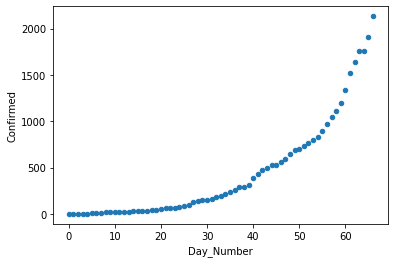

In [71]:
GT_casos.plot.scatter(x = "Day_Number",y="Confirmed")

In [72]:
GT_casos["ln(Confirmed_Cases)"] = np.log(GT_casos["Confirmed"])

In [73]:
GT_casos

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Day_Number,ln(Confirmed_Cases)
13903,NaN,Guatemala,15.7835,-90.2308,3/14/20,1,0,0,0,0.000000
14168,NaN,Guatemala,15.7835,-90.2308,3/15/20,1,0,0,1,0.000000
14433,NaN,Guatemala,15.7835,-90.2308,3/16/20,2,1,0,2,0.693147
14698,NaN,Guatemala,15.7835,-90.2308,3/17/20,6,1,0,3,1.791759
14963,NaN,Guatemala,15.7835,-90.2308,3/18/20,6,1,0,4,1.791759
...,...,...,...,...,...,...,...,...,...,...
30333,NaN,Guatemala,15.7835,-90.2308,5/15/20,1643,30,135,62,7.404279
30598,NaN,Guatemala,15.7835,-90.2308,5/16/20,1763,33,138,63,7.474772
30863,NaN,Guatemala,15.7835,-90.2308,5/17/20,1763,33,138,64,7.474772
31128,NaN,Guatemala,15.7835,-90.2308,5/18/20,1912,35,138,65,7.555905


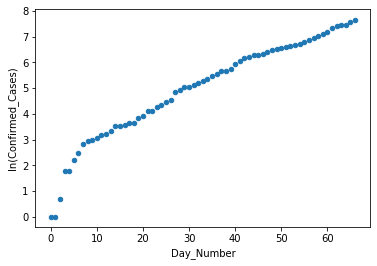

In [74]:
GT_casos.plot.scatter(x = "Day_Number",y="ln(Confirmed_Cases)")

### Entrenando un modelo de regresion lineal con la variable transformada Confirmed

In [75]:
n = GT_casos.shape[0]
x1 = (pd.Series(GT_casos['Day_Number'])).values.reshape(n,1)
y1 = (pd.Series(GT_casos['ln(Confirmed_Cases)'])).values.reshape(n,1)

In [76]:
def modelo_GD2(x, y, lr, epochs):
    
    tf.reset_default_graph()
    g = tf.Graph()

    with g.as_default():
   
        n = len(x)

        tensor_x = tf.placeholder(tf.float32,[n,1],"tensor_x")
        tensor_y = tf.placeholder(tf.float32,[n,1],"tensor_y")
        unos = tf.ones([n,1], tf.float32, "unos")
        matriz = tf.concat([tensor_x, unos], 1)

        parametros = tf.get_variable("parametro", dtype=tf.float32, shape=[2, 1], initializer=tf.constant_initializer(2))

        # hipotesis y = mx + b
        with tf.name_scope("Hipotesis"):
            y_hat = tf.matmul(matriz, parametros)
    
        # funcion de costo
        with tf.name_scope("Costo"):
            costo = tf.reduce_sum(tf.pow(y_hat - tensor_y, 2)) / (2 * n)
    
        # gradiente
        with tf.name_scope("Gradiente"):
            gradiente = tf.gradients(costo, [parametros])
            gradiente2 = gradiente[0]
    

        # actualizacion de parametros
        with tf.name_scope("Parametros"):
            parametros_actual = tf.add(tf.multiply(gradiente2, -lr), parametros)
            parametros = parametros.assign(parametros_actual)


        plt.scatter(x, y)

        
        # batch gradient descent - uso de todo el dataset
        with tf.train.MonitoredSession() as session:
            
            feed_dict = {tensor_x: x, tensor_y: y}
    
            for i in range(epochs+1):

                session.run(costo,feed_dict=feed_dict)

                if i % 100 == 0:
                    print("Costo:")
                    print(session.run(costo, feed_dict = feed_dict))
                
                    print("Gradiente:")
                    print(session.run(gradiente2, feed_dict = feed_dict))
                
                    print("Parametros m y b:")
                    print(session.run(parametros, feed_dict = feed_dict))
        
                    predicciones = session.run(y_hat,feed_dict=feed_dict)

        
                    plt.plot(x,predicciones,label=str(i))

        plt.legend()
        plt.show()
        
    return(parametros)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Costo:
2664.8687
Gradiente:
[[2792.327  ]
 [  63.02023]]
Parametros m y b:
[[0.60383654]
 [1.9684899 ]]
Costo:
191.683
Gradiente:
[[748.7002 ]
 [ 16.91532]]
Parametros m y b:
[[0.22948644]
 [1.9600322 ]]
Costo:
13.879427
Gradiente:
[[200.74678  ]
 [  4.5533075]]
Parametros m y b:
[[0.12911305]
 [1.9577556 ]]
Costo:
1.0966965
Gradiente:
[[53.825417 ]
 [ 1.2387085]]
Parametros m y b:
[[0.10220034]
 [1.9571362 ]]
Costo:
0.17771286
Gradiente:
[[14.431676  ]
 [ 0.34996963]]
Parametros m y b:
[[0.0949845]
 [1.9569612]]
Costo:
0.11164465
Gradiente:
[[3.8691325 ]
 [0.11167206]]
Parametros m y b:
[[0.09304994]
 [1.9569054 ]]
Costo:
0.10689456
Gradiente:
[[1.0370232 ]
 [0.04777563]]
Parametros m y b:
[[0.09253143]
 [1.9568815 ]]


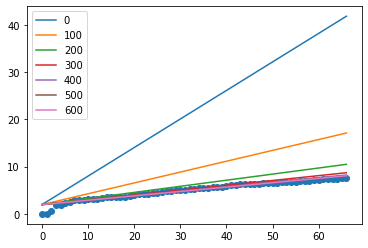

In [77]:
parametro_trans = modelo_GD2(x1, y1, 0.001/2, 600)

### Parametros del modelo de regresion lineal con la variable transformada Confirmed

m = 0.09234521
b = 1.9567069

Costo convergiendo a 0.10652246

#### Modelo Transformado: 

$ln[y] = mx + b$

$ln[y] = 0.09234521x + 1.9567069$



### Regresando a un Modelo Exponencial

$ln[y] = 0.09234521x + 1.9567069$

$e^(ln[y]) = e^(0.09234521x + 1.9567069)$

$y = e^(0.09234521x) * e^(1.9567069)$

In [78]:
np.exp(1.9567069)

7.07598672333107

#### Modelo Exponencial: 

$y = (7.07598672)e^(0.09234521x)$ 

In [79]:
y = np.exp(1.9567069)*np.exp(0.09234521*x1)

In [80]:
GT_casos["Modelo_Exp"] = np.exp(1.9567069) * np.exp(0.09234521 * GT_casos["Day_Number"])

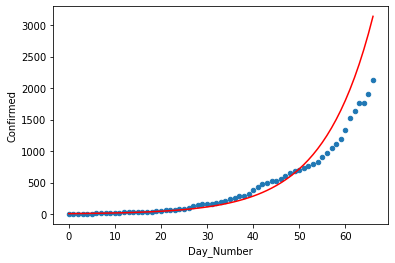

In [81]:
GT_casos.plot.scatter(x = "Day_Number",y="Confirmed")
plt.plot(x1,y, color = 'r')
plt.show()

### Aproximacion al 6 de Junio

**Dia 0:**

14 de marzo 2020

3/14/20

In [82]:
Dia_Cero = datetime.datetime(2020,3,14)

In [83]:
Dia_Pred = datetime.datetime(2020,6,6)

In [84]:
numero_dias = Dia_Pred - Dia_Cero

In [85]:
print(numero_dias)

84 days, 0:00:00


In [86]:
y = np.exp(1.9567069)*np.exp(0.09234521*x1)

In [87]:
y = np.exp(1.9567069)*np.exp(0.09234521*84)
print(y)

16542.771863561204


### La cantidad de casos confirmados para el 6 de junio 2020 es de 16,542.77, aproximado a 16,543 casos.

## Parte 2 - Modelo polinomial de calidad de vinos

In [88]:
data = pd.read_csv('winequality-red.csv')
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Analisis Exploratorio

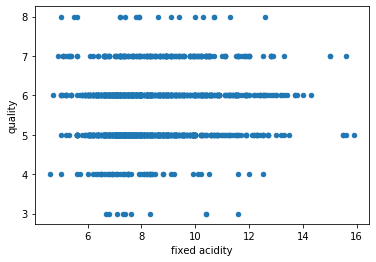

In [89]:
data.plot.scatter(x = "fixed acidity",y="quality")


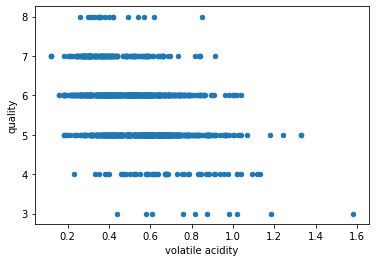

In [90]:
data.plot.scatter(x = "volatile acidity",y="quality")

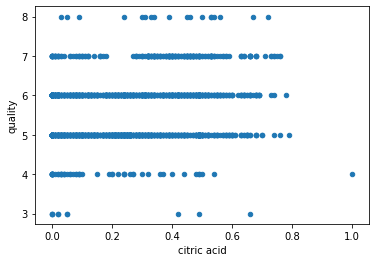

In [91]:
data.plot.scatter(x = "citric acid",y="quality")

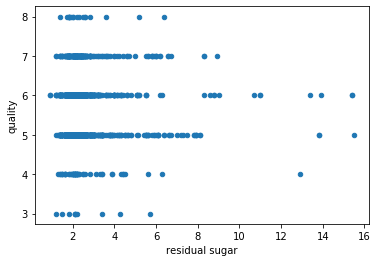

In [92]:
data.plot.scatter(x = "residual sugar",y="quality")

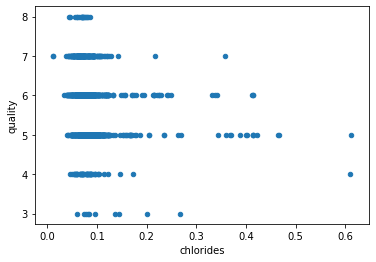

In [93]:
data.plot.scatter(x = "chlorides",y="quality")

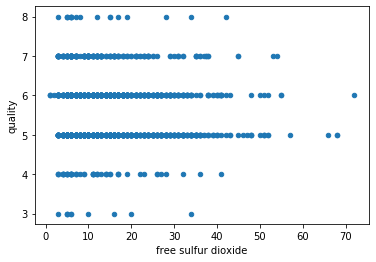

In [94]:
data.plot.scatter(x = "free sulfur dioxide",y="quality")

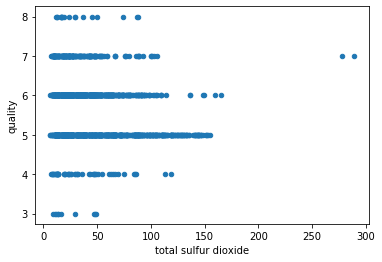

In [95]:
data.plot.scatter(x = "total sulfur dioxide",y="quality")

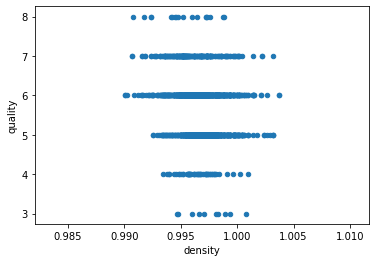

In [96]:
data.plot.scatter(x = "density",y="quality")

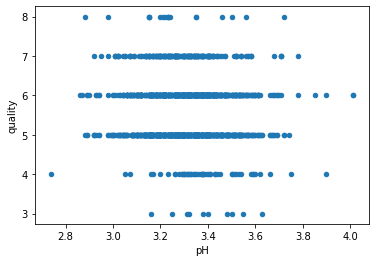

In [97]:
data.plot.scatter(x = "pH",y="quality")

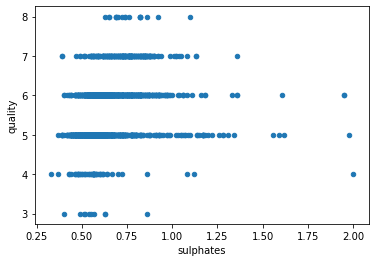

In [98]:
data.plot.scatter(x = "sulphates",y="quality")

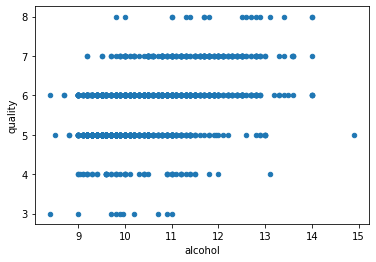

In [99]:
data.plot.scatter(x = "alcohol",y="quality")

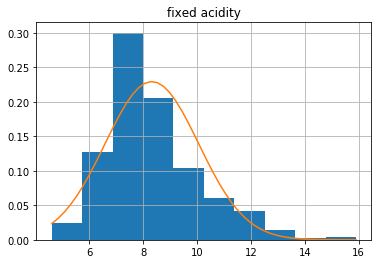

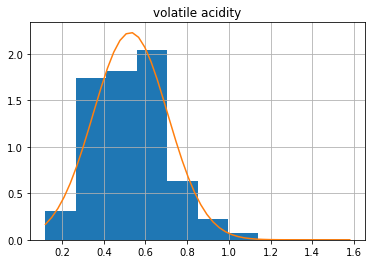

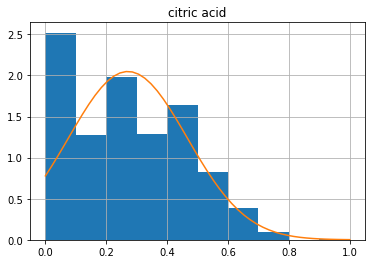

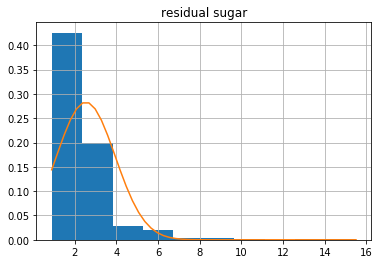

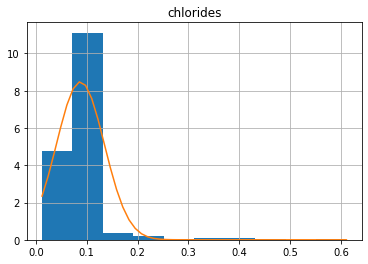

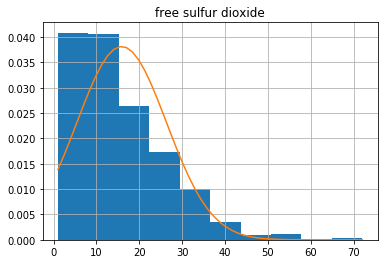

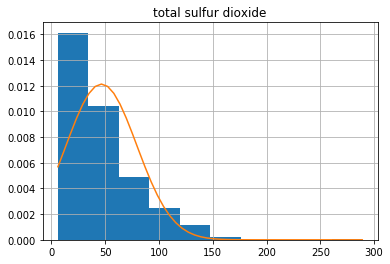

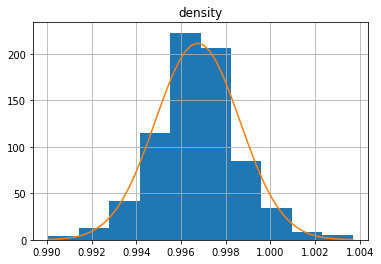

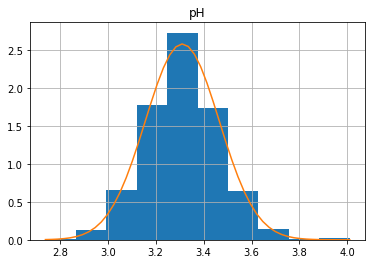

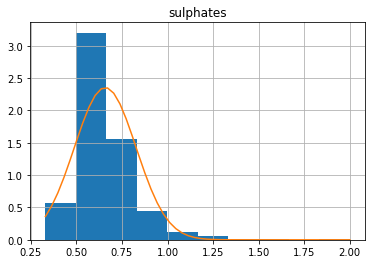

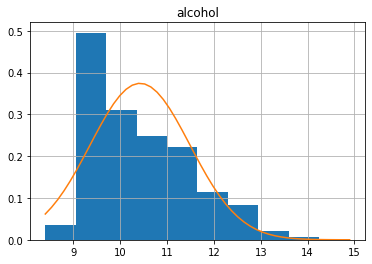

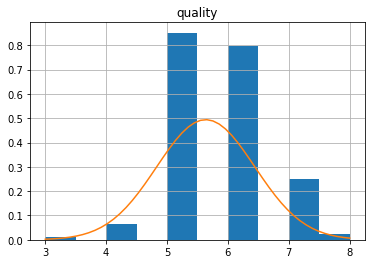

In [100]:
for col in data.columns:
    data.loc[:, col].hist(density = True)
    norm_fit = norm.fit(data.loc[:, col])
    norm_dist_fitted = norm(*norm_fit)
    plt.title(col)

    X_range = data.loc[:, col].min(),data.loc[:, col].max()
    X_values =  np.linspace(*X_range)
    plt.plot(X_values,norm_dist_fitted.pdf(X_values))
    plt.show()

In [101]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Al realizar un análisis exploratorio del comportamiento de cada una de las features, se decide escoger a:

* Fixed acidity
* pH
* Alcohol

Dado que los datos de estas features presentan una menor variabilidad, por lo que estan menos dispersos respecto a la media como puede observarse en los histogramas. A su vez puede verse que presentan un sesgo a la derecha; sin embargo, no es tan pronunciado por lo que podrían aproximarse bastante bien a una distribución normal para trabajar con ellos.

## Feature Engineering

### Datos Sesgados

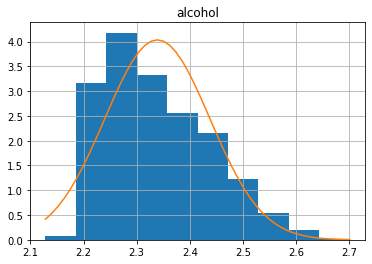

In [102]:
log_X = np.log(data['alcohol'])
log_X.hist(density = True)
norm_fit = norm.fit(log_X)
norm_dist_fitted = norm(*norm_fit)
plt.title('alcohol')

X_range = log_X.min(),log_X.max()
X_values =  np.linspace(*X_range)
plt.plot(X_values,norm_dist_fitted.pdf(X_values))
plt.show()

data["ln_alcohol"] = np.log(data["alcohol"])

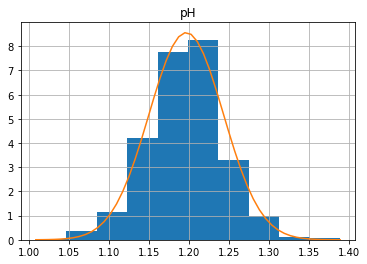

In [103]:
log_X = np.log(data['pH'])
log_X.hist(density = True)
norm_fit = norm.fit(log_X)
norm_dist_fitted = norm(*norm_fit)
plt.title('pH')

X_range = log_X.min(),log_X.max()
X_values =  np.linspace(*X_range)
plt.plot(X_values,norm_dist_fitted.pdf(X_values))
plt.show()

data["ln_pH"] = np.log(data["pH"])

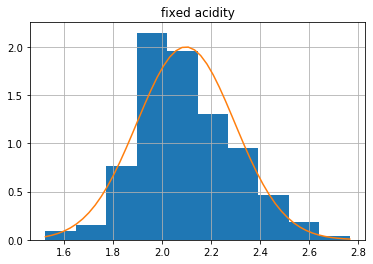

In [104]:
log_X = np.log(data['fixed acidity'])
log_X.hist(density = True)
norm_fit = norm.fit(log_X)
norm_dist_fitted = norm(*norm_fit)
plt.title('fixed acidity')

X_range = log_X.min(),log_X.max()
X_values =  np.linspace(*X_range)
plt.plot(X_values,norm_dist_fitted.pdf(X_values))
plt.show()

data["ln fixed acidity"] = np.log(data["fixed acidity"])

In [105]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ln_alcohol,ln_pH,ln fixed acidity
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.240710,1.255616,2.001480
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2.282382,1.163151,2.054124
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2.282382,1.181727,2.054124
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2.282382,1.150572,2.415914
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.240710,1.255616,2.001480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2.351375,1.238374,1.824549
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2.415914,1.258461,1.774952
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2.397895,1.229641,1.840550
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2.322388,1.272566,1.774952


Se selecciona un polinomio de grado 3:

$a = ln(alcohol)$
$b = ln(pH)$
$c = ln(fixedAcidity)$
 
 $[1,a,b,c,a^{3},b^{3},c^{3},abc]$
 
Se eligen las siguientes variables para armar el modelo polinomial:

 $[x_0 = 1,x_1 = a^{3},x_2 = b^{3},x_3 = c^{3}]$

### Añadiendo features al dataset

In [106]:
data["x1"] = np.power(data["ln_alcohol"],3)
data["x2"] = np.power(data["ln_pH"],3)
data["x3"] = np.power(data["ln fixed acidity"],3)

In [107]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ln_alcohol,ln_pH,ln fixed acidity,x1,x2,x3
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.240710,1.255616,2.001480,11.250110,1.979569,8.017773
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2.282382,1.163151,2.054124,11.889545,1.573650,8.667220
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2.282382,1.181727,2.054124,11.889545,1.650257,8.667220
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2.282382,1.150572,2.415914,11.889545,1.523146,14.100818
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.240710,1.255616,2.001480,11.250110,1.979569,8.017773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2.351375,1.238374,1.824549,13.000673,1.899134,6.073888
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2.415914,1.258461,1.774952,14.100818,1.993055,5.591909
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2.397895,1.229641,1.840550,13.787662,1.859236,6.235088
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2.322388,1.272566,1.774952,12.525763,2.060822,5.591909


### Estandarizando features

In [108]:
mean_x1 = data['x1'].mean()
ds_x1 = data['x1'].std()

mean_x2 = data['x2'].mean()
ds_x2 = data['x2'].std()

mean_x3 = data['x3'].mean()
ds_x3 = data['x3'].std()

In [109]:
data["x1n"] = (data["x1"]-mean_x1) / ds_x1
data["x2n"] = (data["x2"]-mean_x2) / ds_x2
data["x3n"] = (data["x3"]-mean_x3) / ds_x3

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,quality,ln_alcohol,ln_pH,ln fixed acidity,x1,x2,x3,x1n,x2n,x3n
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,5,2.240710,1.255616,2.001480,11.250110,1.979569,8.017773,-0.965835,1.295889,-0.529952
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,...,5,2.282382,1.163151,2.054124,11.889545,1.573650,8.667220,-0.583650,-0.726111,-0.296303
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,...,5,2.282382,1.181727,2.054124,11.889545,1.650257,8.667220,-0.583650,-0.344506,-0.296303
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,...,6,2.282382,1.150572,2.415914,11.889545,1.523146,14.100818,-0.583650,-0.977687,1.658520
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,5,2.240710,1.255616,2.001480,11.250110,1.979569,8.017773,-0.965835,1.295889,-0.529952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,...,5,2.351375,1.238374,1.824549,13.000673,1.899134,6.073888,0.080461,0.895223,-1.229295
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,...,6,2.415914,1.258461,1.774952,14.100818,1.993055,5.591909,0.738008,1.363068,-1.402695
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,...,6,2.397895,1.229641,1.840550,13.787662,1.859236,6.235088,0.550837,0.696477,-1.171301
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,...,5,2.322388,1.272566,1.774952,12.525763,2.060822,5.591909,-0.203389,1.700637,-1.402695


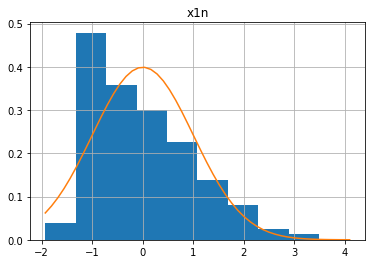

In [110]:
data.loc[:, "x1n"].hist(density = True)
norm_fit = norm.fit(data.loc[:, "x1n"])
norm_dist_fitted = norm(*norm_fit)
plt.title("x1n")

X_range = data.loc[:, "x1n"].min(),data.loc[:, "x1n"].max()
X_values =  np.linspace(*X_range)
plt.plot(X_values,norm_dist_fitted.pdf(X_values))
plt.show()

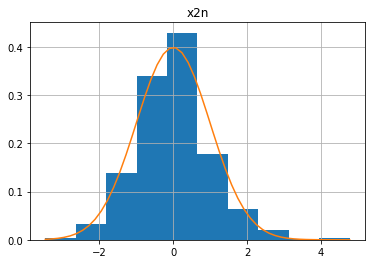

In [111]:
data.loc[:, "x2n"].hist(density = True)
norm_fit = norm.fit(data.loc[:, "x2n"])
norm_dist_fitted = norm(*norm_fit)
plt.title("x2n")

X_range = data.loc[:, "x2n"].min(),data.loc[:, "x2n"].max()
X_values =  np.linspace(*X_range)
plt.plot(X_values,norm_dist_fitted.pdf(X_values))
plt.show()

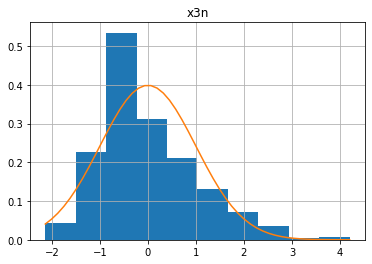

In [112]:
data.loc[:, "x3n"].hist(density = True)
norm_fit = norm.fit(data.loc[:, "x3n"])
norm_dist_fitted = norm(*norm_fit)
plt.title("x3n")

X_range = data.loc[:, "x3n"].min(),data.loc[:, "x3n"].max()
X_values =  np.linspace(*X_range)
plt.plot(X_values,norm_dist_fitted.pdf(X_values))
plt.show()

### Regresion lineal con features polinomiales

In [113]:
m = data.shape[0]
entrenar = np.concatenate(((pd.Series(data['x1n'])).values.reshape(m,1),(pd.Series(data['x2n'])).values.reshape(m,1),(pd.Series(data['x3n'])).values.reshape(m,1)), axis = 1)
y2 = (pd.Series(data['quality'])).values.reshape(m,1)

#x1 = (pd.Series(data['x1n'])).values.reshape(n,1)
#y1 = (pd.Series(GT_casos['ln(Confirmed_Cases)'])).values.reshape(n,1)

In [114]:
z = np.shape(entrenar)
z[1]

3

In [115]:
np.array([list(data["x1n"]), list(data["x2n"])])

array([[-0.96583456, -0.58365036, -0.58365036, ...,  0.55083743,
        -0.20338855,  0.55083743],
       [ 1.29588868, -0.72611126, -0.34450633, ...,  0.69647708,
         1.70063659,  0.49882065]])

In [116]:
(pd.Series(data['x1n'])).values.reshape(m,1)
(pd.Series(data['x2n'])).values.reshape(m,1)
(pd.Series(data['x3n'])).values.reshape(m,1)

np.concatenate(((pd.Series(data['x1n'])).values.reshape(m,1),(pd.Series(data['x2n'])).values.reshape(m,1),(pd.Series(data['x3n'])).values.reshape(m,1)), axis = 1)

array([[-0.96583456,  1.29588868, -0.52995182],
       [-0.58365036, -0.72611126, -0.29630315],
       [-0.58365036, -0.34450633, -0.29630315],
       ...,
       [ 0.55083743,  0.69647708, -1.171301  ],
       [-0.20338855,  1.70063659, -1.4026949 ],
       [ 0.55083743,  0.49882065, -1.34500315]])

In [117]:
def modelo_polinomial(df, y, lr, epochs):
    
    tf.reset_default_graph()
    g = tf.Graph()

    with g.as_default():
   
        m = len(df)
        z = np.shape(df)

        features = tf.placeholder(tf.float32,[z[0],z[1]],"Features")
        tensor_y = tf.placeholder(tf.float32,[z[0],1],"Tensor_y")
        unos = tf.ones([m,1], tf.float32, "Unos")
        matriz = tf.concat([unos, features], 1)

        parametros = tf.get_variable("Parametros", dtype=tf.float32, shape=[z[1]+1, 1], initializer=tf.zeros_initializer())

        # hipotesis y = 1x0 + p1x1 + p2x2 + p3x3 + p4x4 + ...
        with tf.name_scope("Hipotesis"):
            y_hat = tf.matmul(matriz, parametros, name = "y_hat")
    
        # funcion de costo
        with tf.name_scope("Costo"):
            costo = tf.reduce_sum(tf.pow(y_hat - tensor_y, 2), name = "Costo") / (2 * m)
            scalar_costo = tf.summary.scalar('Scalar Modelo Polinomial', costo)

    
        # gradiente
        with tf.name_scope("Gradiente"):
            gradiente = tf.gradients(costo, [parametros], name = "Gradiente")
            gradiente2 = gradiente[0]
    

        # actualizacion de parametros
        with tf.name_scope("Parametros"):
            parametros_actual = tf.add(tf.multiply(gradiente2, -lr), parametros, name = "Actual_Parametros")
            parametros = parametros.assign(parametros_actual, name = "Asignacion_Parametros")

        
        # batch gradient descent - uso de todo el dataset
        with tf.train.MonitoredSession() as session:
            
            writer = tf.summary.FileWriter(('./Model_Polinomial_'+'LR='+str(lr)+'_Grado=3'+'_Epochs='+str(epochs)), session.graph)

            feed_dict = {features: df, tensor_y: y}
    
            for i in range(epochs+1):

                session.run(gradiente2, feed_dict = feed_dict)
                session.run(parametros_actual, feed_dict = feed_dict)
                session.run(parametros, feed_dict = feed_dict)
                sc = session.run(scalar_costo,feed_dict=feed_dict)
                writer.add_summary(sc, epochs+1)
                session.run(costo,feed_dict=feed_dict)

    return(parametros)


In [127]:
modelo_polinomial(entrenar, y2, 1, 100)

INFO:tensorflow:Summary name Scalar Modelo Polinomial is illegal; using Scalar_Modelo_Polinomial instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<tf.Tensor 'Parametros_1/Asignacion_Parametros:0' shape=(4, 1) dtype=float32_ref>

### Grafo

In [128]:
from PIL import Image

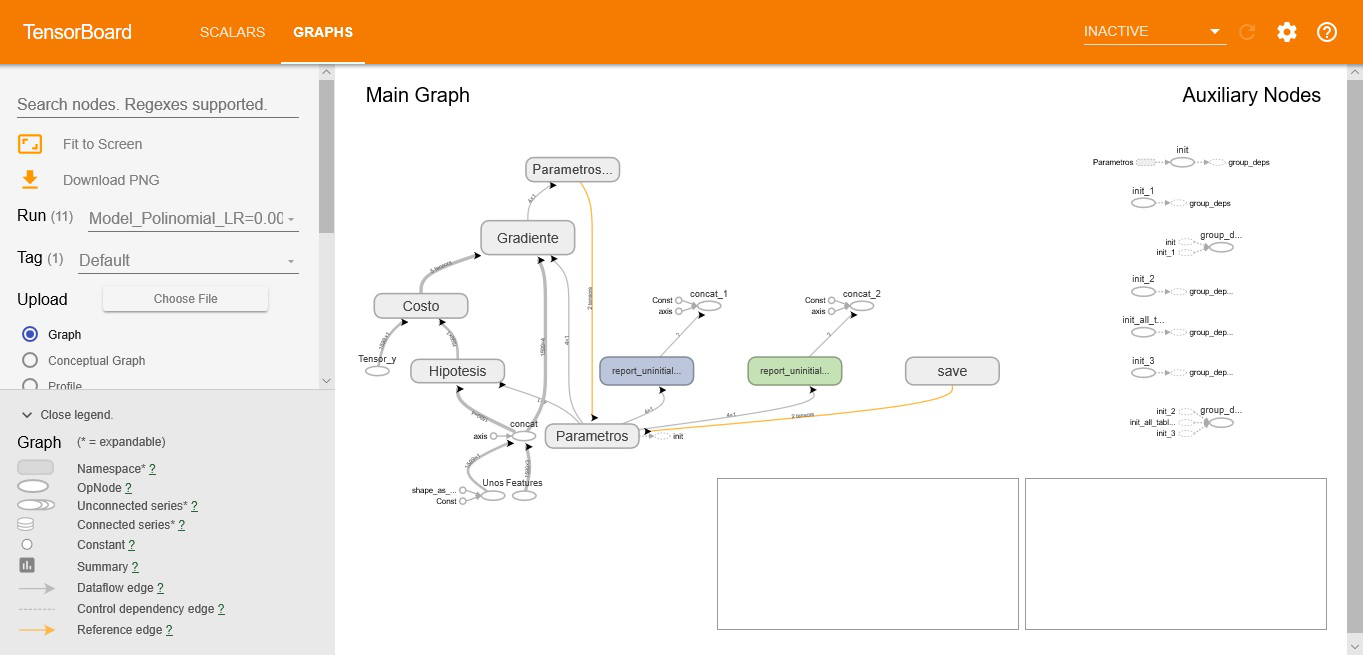

In [136]:
Image.open('Grafo 1 Tarea 3 Polinomios.jpg','r') 

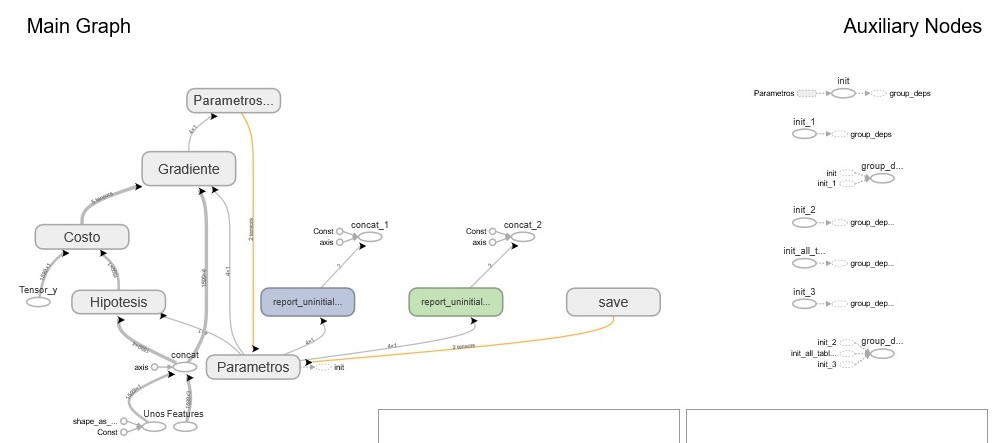

In [137]:
Image.open('Grafo 2 Tarea 3 Polinomios.jpg','r') 

### Scalar Costo 

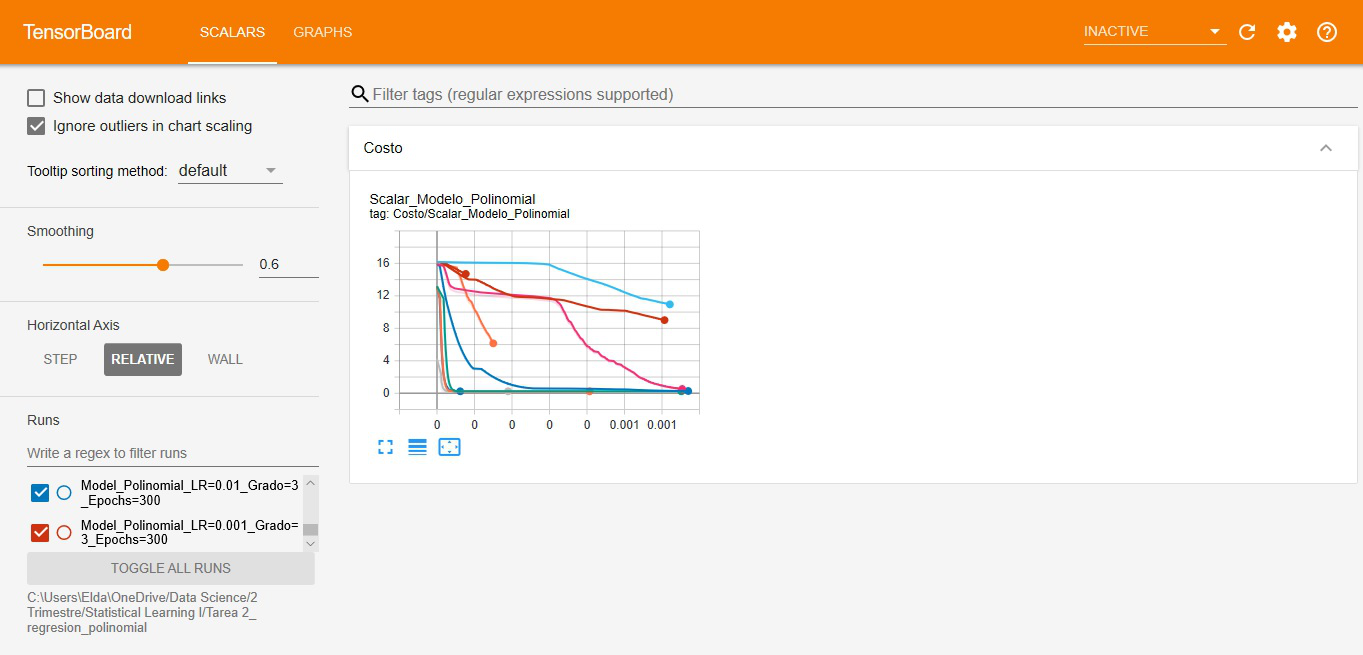

In [132]:
Image.open('Scalar 1 Tarea 3 Polinomios.jpg','r') 

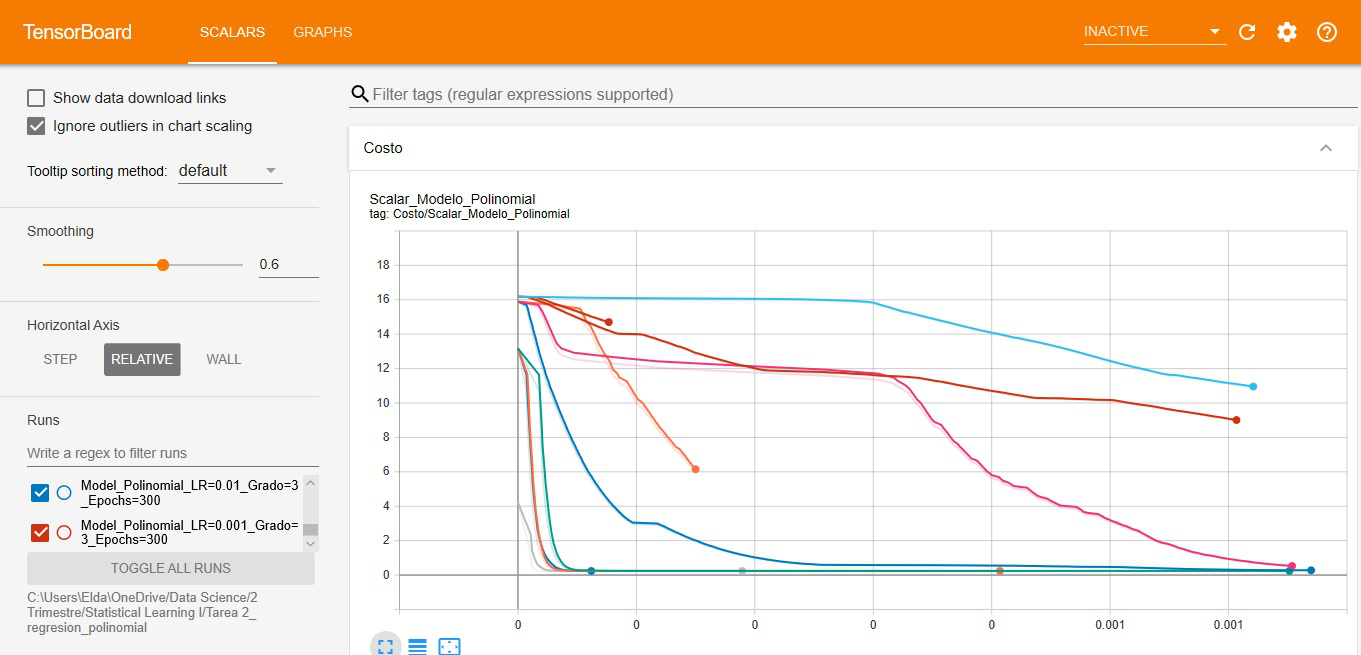

In [134]:
Image.open('Scalar 2 Tarea 3 Polinomios.jpg','r') 

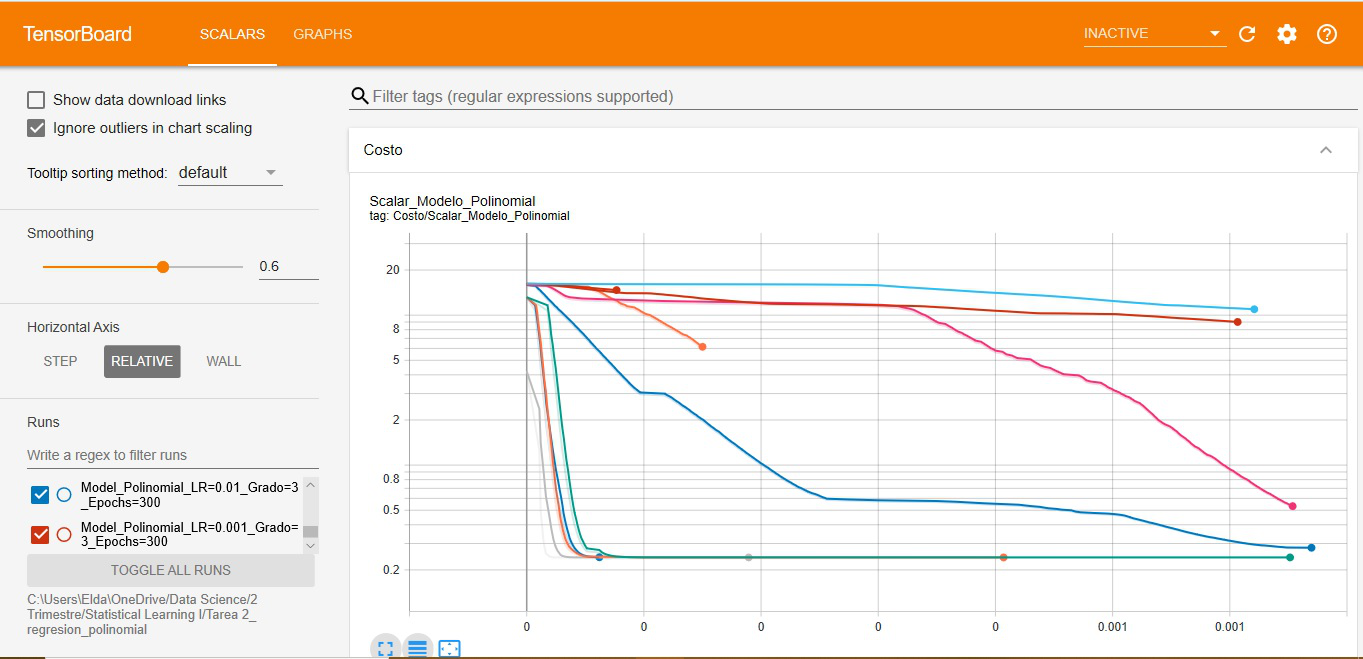

In [138]:
Image.open('Scalar 3 Tarea 3 Polinomios.jpg','r') 

### Directorio

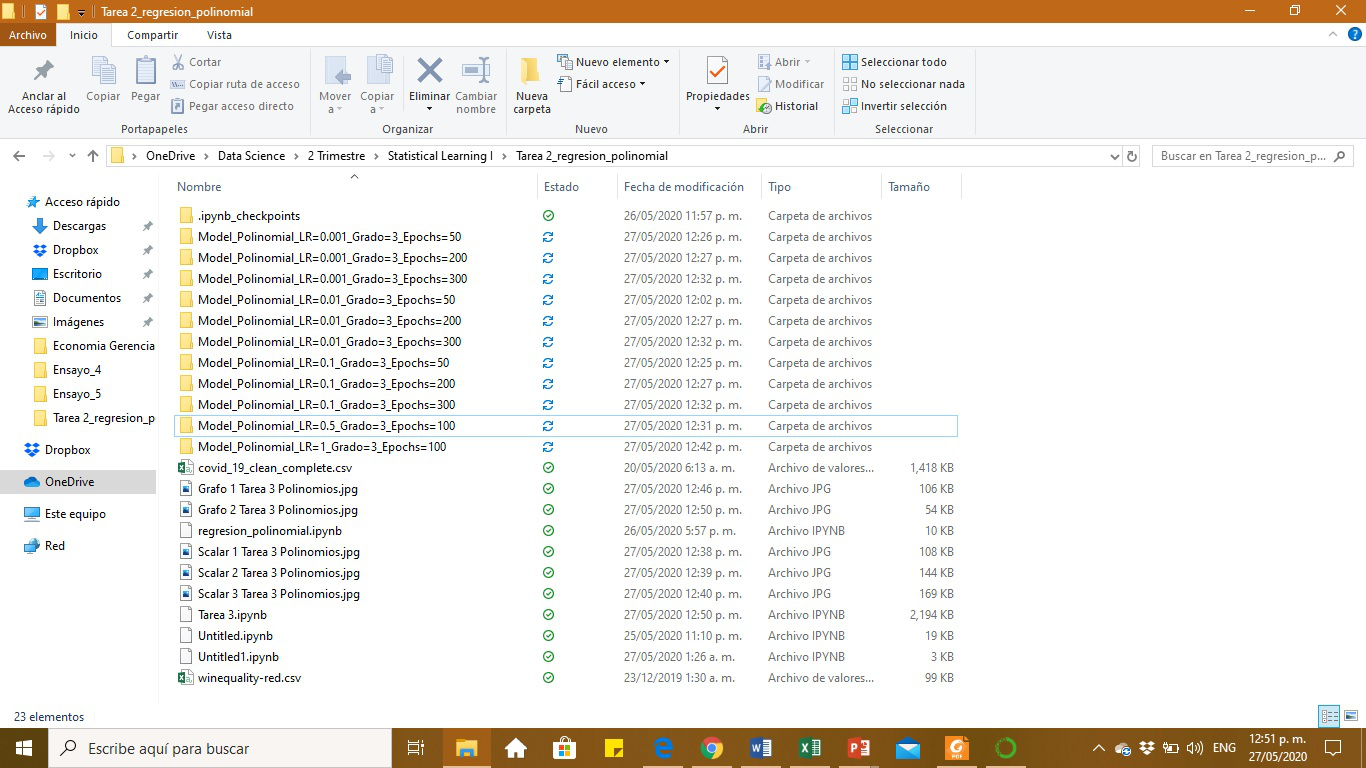

In [139]:
Image.open('Directorio.jpg','r') 

## Conclusión:

Se ejecutaron varios experimentos variando el valor de learning rate y la cantidad de iteraciones (epochs), obteniendo los siguientes resultados para el modelo polinomial:

* Si el learning rate es muy pequeño la disminución de la función costo se hace más lenta y por tanto también la convergencia

* Mientras el valor del learning rate sea más cercano a uno la disminución y convergencia de la función costo es más rápida.

* De los valores de learning rate utilizados, el de 0.5 y 0.1 produjeron una convergencia rápida.

* Por tanto, se puede concluir que de los modelos generados el mejor es aquel con learning rate de 0.5 (color gris) que se puede observar produjo una convergencia con una cantidad de epochs de 100, lo cual se puede visualizar en la gráfica de Scalar Costo del modelo polinomial.